C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\941031312.py:46: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\941031312.py:46: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\941031312.py:46: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\941031312.py:46: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\941031312.py:46: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\941031312.py:46: UserWarning: Glyph 26

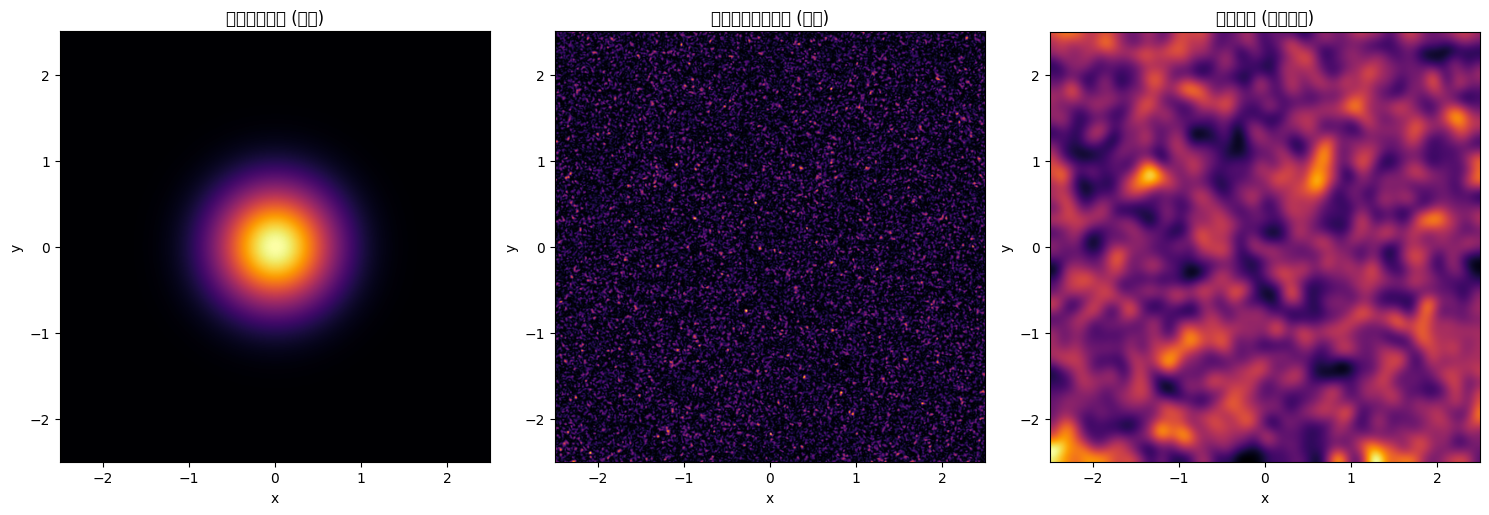

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
N = 512
L = 5.0  # 空间范围
dx = L / N
x = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, x)

# 输入高斯光斑
w0 = 0.7  # 光斑半径
I_in = np.exp(-(X**2 + Y**2) / (w0**2))

# 随机相位
phi = np.random.rand(N, N) * 2 * np.pi
E_in = np.sqrt(I_in) * np.exp(1j * phi)

# 傅里叶变换（模拟透镜聚焦到焦平面）
E_out = np.fft.fftshift(np.fft.fft2(E_in))
I_out = np.abs(E_out)**2

# 平滑平均（模拟时间平均/统计平均）
from scipy.ndimage import gaussian_filter
I_avg = gaussian_filter(I_out, sigma=10)

# 作图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 输入光斑
axs[0].imshow(I_in, extent=[-L/2,L/2,-L/2,L/2], cmap='inferno')
axs[0].set_title("输入高斯光斑 (强度)")

# 透镜后单次结果 (speckle)
axs[1].imshow(I_out, extent=[-L/2,L/2,-L/2,L/2], cmap='inferno')
axs[1].set_title("透镜后焦平面光斑 (单次)")

# 平均结果 (高斯包络)
axs[2].imshow(I_avg, extent=[-L/2,L/2,-L/2,L/2], cmap='inferno')
axs[2].set_title("统计平均 (高斯包络)")

for ax in axs:
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()


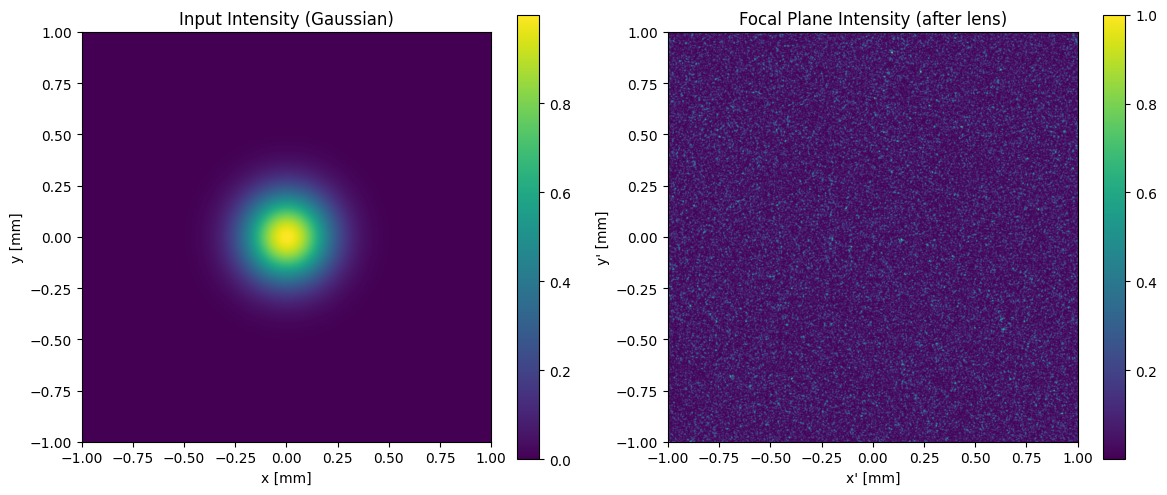

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------
# 参数设置
# ----------------------
wavelength = 10.6e-6   # 波长 10.6 μm
k = 2*np.pi / wavelength

N = 1024              # 采样点数
L = 2e-3              # 计算窗口大小 2 mm
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

# ----------------------
# 输入光场：高斯包络 + 随机相位
# ----------------------
w0 = 0.3e-3   # 高斯光束腰半径 (0.3 mm)
A = np.exp(-(X**2 + Y**2)/w0**2)  # 高斯振幅
phi = 2*np.pi*np.random.rand(N, N) # 随机相位
U_in = A * np.exp(1j*phi)

# ----------------------
# 傅里叶变换 (透镜焦平面场)
# ----------------------
U_f = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(U_in)))
I_f = np.abs(U_f)**2

# 归一化强度
I_f = I_f / np.max(I_f)

# ----------------------
# 画图
# ----------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(np.abs(U_in)**2, extent=[x[0]*1e3, x[-1]*1e3, y[0]*1e3, y[-1]*1e3])
plt.title("Input Intensity (Gaussian)")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(I_f, extent=[x[0]*1e3, x[-1]*1e3, y[0]*1e3, y[-1]*1e3])
plt.title("Focal Plane Intensity (after lens)")
plt.xlabel("x' [mm]")
plt.ylabel("y' [mm]")
plt.colorbar()

plt.tight_layout()
plt.show()


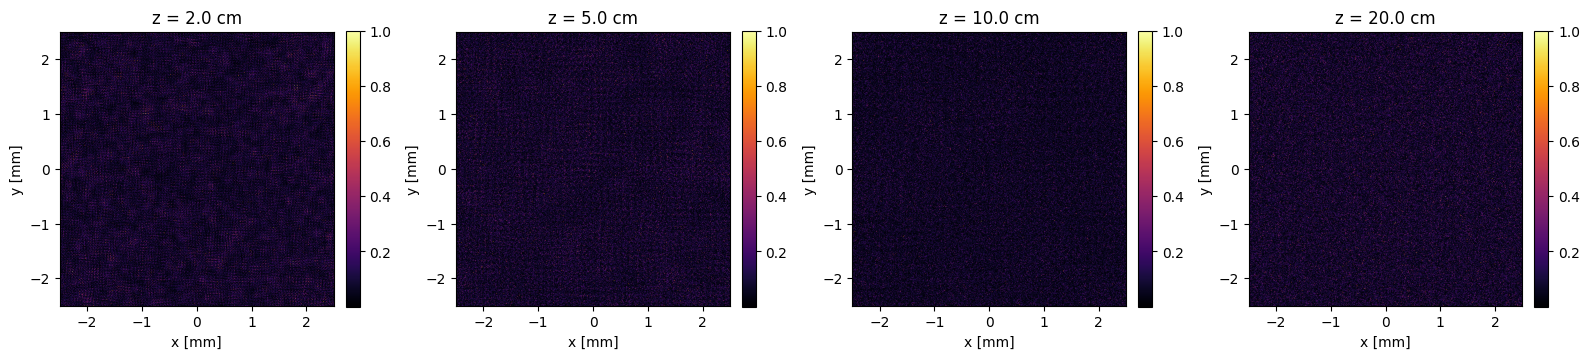

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- 参数设置 ----------------
wavelength = 10.6e-6      # 光波波长 [m]
k = 2 * np.pi / wavelength
f = 0.1                   # 透镜焦距 [m]
beam_waist = 1e-3         # 入射高斯光束腰斑半径 [m]

N = 512                   # 采样点数
L = 5e-3                  # 模拟窗口大小 [m]
dx = L / N                # 采样间隔
x = np.linspace(-L/2, L/2 - dx, N)
X, Y = np.meshgrid(x, x)
r2 = X**2 + Y**2

# ---------------- 入射场：高斯+随机相位 ----------------
amplitude = np.exp(-r2 / (beam_waist**2))
random_phase = np.exp(1j * 2 * np.pi * np.random.rand(N, N))
U_in = amplitude * random_phase

# ---------------- 透镜相位 ----------------
lens_phase = np.exp(-1j * k * r2 / (2 * f))
U_lens = U_in * lens_phase

# ---------------- 角谱传播函数 ----------------
fx = np.fft.fftfreq(N, d=dx)  # 空间频率坐标
FX, FY = np.meshgrid(fx, fx)
f2 = FX**2 + FY**2

def propagate(U0, z):
    H = np.exp(1j * k * z * np.sqrt(1 - (wavelength**2) * f2))
    U1 = np.fft.ifft2(np.fft.fft2(U0) * H)
    return U1

# ---------------- 模拟不同传播距离 ----------------
z_list = [0.2*f, 0.5*f, f, 2*f]
intensity_list = []

for z in z_list:
    Uz = propagate(U_lens, z)
    Iz = np.abs(Uz)**2
    intensity_list.append(Iz / Iz.max())  # 归一化方便比较

# ---------------- 绘图 ----------------
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, z in enumerate(z_list):
    ax = axes[i]
    im = ax.imshow(intensity_list[i], extent=[-L/2*1e3, L/2*1e3, -L/2*1e3, L/2*1e3],
                   cmap='inferno')
    ax.set_title(f"z = {z*100:.1f} cm")
    ax.set_xlabel("x [mm]")
    ax.set_ylabel("y [mm]")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\968915505.py:65: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\968915505.py:65: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\968915505.py:65: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\968915505.py:65: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\968915505.py:65: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\968915505.py:65: UserWarning: Glyph 20

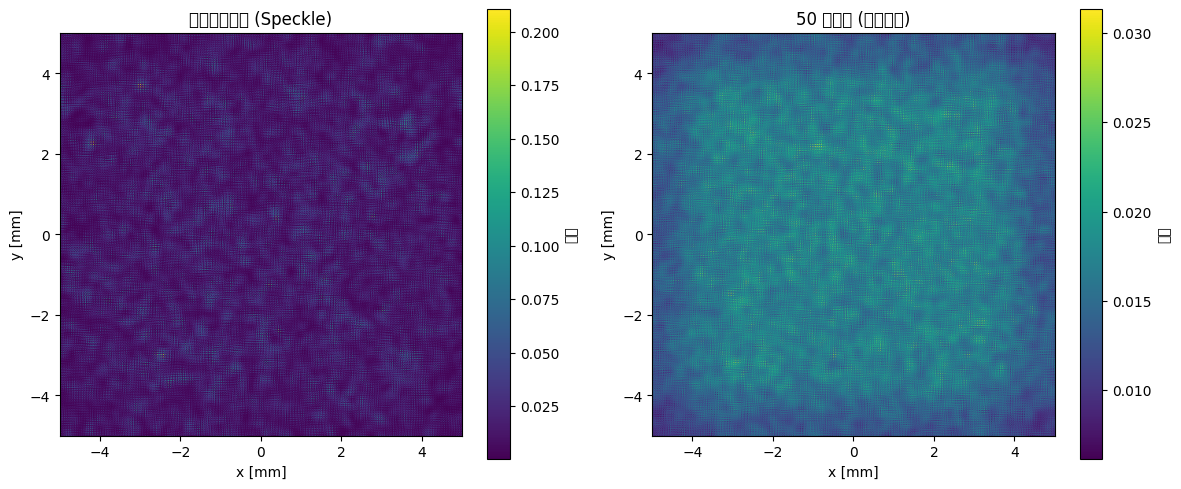

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- 参数设置 ----------------
wavelength = 10.6e-6   # 光源波长 10.6 μm
k = 2 * np.pi / wavelength
f = 50e-3              # 透镜焦距 50 mm
z = f                  # 观察面在焦平面
w0 = 1e-3              # 入射高斯光束半径 1 mm
size = 10e-3           # 仿真窗口大小 10 mm
N = 512                # 采样点数
dx = size / N          # 采样间隔

# 空间坐标
x = np.linspace(-size/2, size/2, N)
y = np.linspace(-size/2, size/2, N)
X, Y = np.meshgrid(x, y)

# ---------------- 角谱传播函数 ----------------
def angular_spectrum_propagate(U_in, z, dx, wavelength):
    N = U_in.shape[0]
    k = 2*np.pi/wavelength
    fx = np.fft.fftfreq(N, d=dx)
    fy = np.fft.fftfreq(N, d=dx)
    FX, FY = np.meshgrid(fx, fy)
    H = np.exp(1j * k * z * np.sqrt(1 - (wavelength*FX)**2 - (wavelength*FY)**2))
    U_out = np.fft.ifft2(np.fft.fft2(U_in) * H)
    return U_out

# ---------------- 单次随机相位 ----------------
phase = np.exp(1j * 2 * np.pi * np.random.rand(N, N))
U_in = np.exp(-(X**2+Y**2)/w0**2) * phase
U_lens = U_in * np.exp(-1j*k*(X**2+Y**2)/(2*f))
U_out = angular_spectrum_propagate(U_lens, z, dx, wavelength)
I_single = np.abs(U_out)**2

# ---------------- 多次平均 ----------------
Nreal = 50  # 平均次数
I_avg = np.zeros((N, N))
for _ in range(Nreal):
    phase = np.exp(1j * 2 * np.pi * np.random.rand(N, N))
    U_in = np.exp(-(X**2+Y**2)/w0**2) * phase
    U_lens = U_in * np.exp(-1j*k*(X**2+Y**2)/(2*f))
    U_out = angular_spectrum_propagate(U_lens, z, dx, wavelength)
    I_avg += np.abs(U_out)**2
I_avg /= Nreal

# ---------------- 绘图 ----------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(I_single, extent=[-size/2*1e3,size/2*1e3,-size/2*1e3,size/2*1e3])
plt.title("单次随机相位 (Speckle)")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.colorbar(label="强度")

plt.subplot(1,2,2)
plt.imshow(I_avg, extent=[-size/2*1e3,size/2*1e3,-size/2*1e3,size/2*1e3])
plt.title(f"{Nreal} 次平均 (平滑光斑)")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.colorbar(label="强度")

plt.tight_layout()
plt.show()


C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\64936858.py:33: RuntimeWarning: invalid value encountered in sqrt
  H = np.exp(1j * k * z * np.sqrt(1 - (wavelength*FX)**2 - (wavelength*FY)**2))


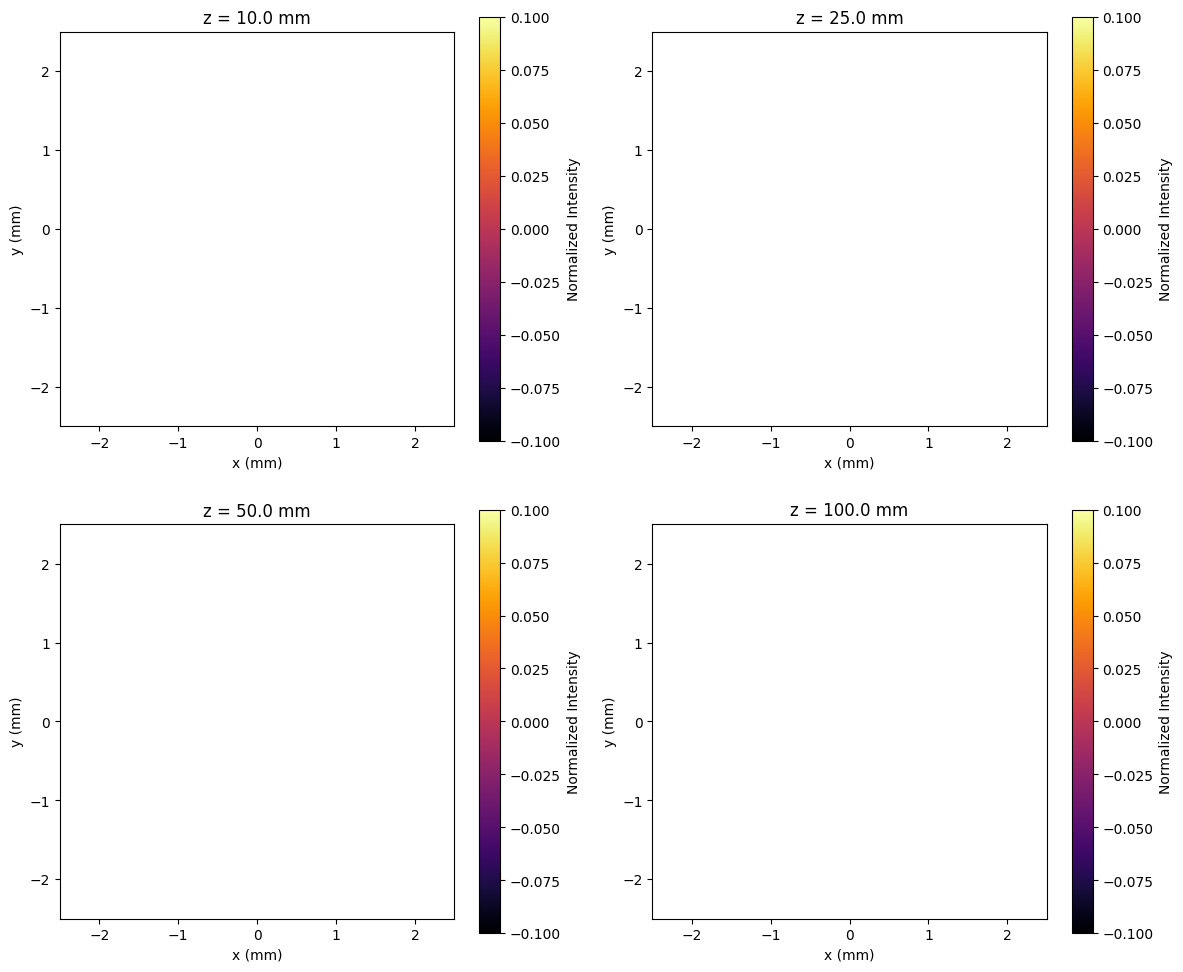

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 参数
wavelength = 10.6e-6   # 10.6 µm
k = 2 * np.pi / wavelength
f = 0.05               # 透镜焦距 5 cm
N = 1024               # 网格点
L = 5e-3               # 计算窗口大小 5 mm
dx = L / N             # 采样间隔
x = np.linspace(-L/2, L/2-dx, N)
X, Y = np.meshgrid(x, x)

# 输入高斯光斑
w0 = 0.5e-3  # 光斑半径 0.5 mm
amp = np.exp(-(X**2+Y**2)/w0**2)

# 随机相位（平滑处理）
phi = np.random.rand(N, N)
phi = np.fft.ifft2(np.fft.fft2(phi) * np.exp(-(X**2+Y**2)/(1e-6)))  # 高斯低通滤波
phi = np.angle(phi)
Uin = amp * np.exp(1j * phi)

# 加透镜相位
Ulens = Uin * np.exp(-1j*k*(X**2+Y**2)/(2*f))

# 构造频率坐标
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)

# 角谱传播函数
def propagate(U0, z):
    H = np.exp(1j * k * z * np.sqrt(1 - (wavelength*FX)**2 - (wavelength*FY)**2))
    U1 = np.fft.ifft2(np.fft.fft2(U0) * H)
    return U1

# 传播距离
z_list = [0.2*f, 0.5*f, f, 2*f]
fields = [propagate(Ulens, z) for z in z_list]

# 作图
plt.figure(figsize=(12, 10))
for i, (z, Uz) in enumerate(zip(z_list, fields)):
    I = np.abs(Uz)**2
    plt.subplot(2, 2, i+1)
    plt.imshow(I / I.max(), cmap='inferno', extent=[-L/2*1e3, L/2*1e3, -L/2*1e3, L/2*1e3])
    plt.title(f"z = {z*1000:.1f} mm")
    plt.xlabel("x (mm)")
    plt.ylabel("y (mm)")
    plt.colorbar(label="Normalized Intensity")
plt.tight_layout()
plt.show()


C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:61: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:61: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:61: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:61: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:61: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:61: UserWarning: Glyph 24

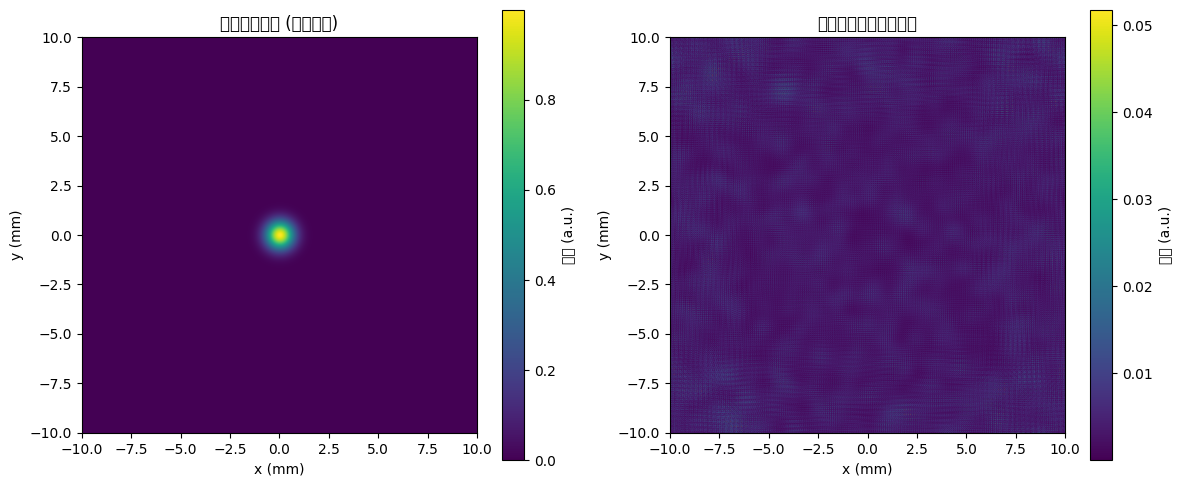

C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:80: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:80: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:80: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:80: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:80: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\593053822.py:80: UserWarning: Glyph 24

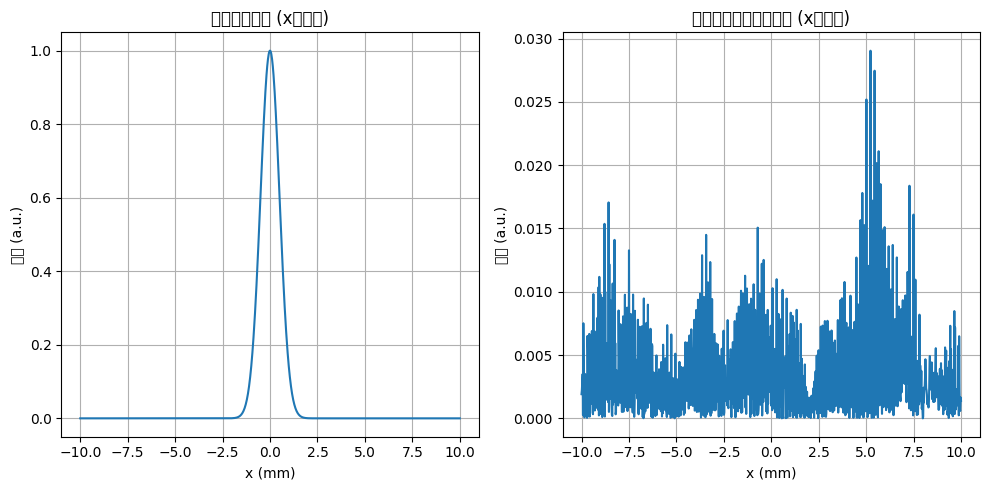

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

# 参数设置
wavelength = 10.6e-6  # 波长 10.6μm
k = 2 * np.pi / wavelength  # 波数
w0 = 1e-3  # 光束束腰半径 1mm
f = 0.2  # 透镜焦距 0.2m

# 计算网格
N = 1024  # 采样点数
L = 0.02  # 计算区域大小 2cm
x = np.linspace(-L/2, L/2, N)
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)

# 创建初始场：高斯强度分布 + 随机相位
initial_intensity = np.exp(-2 * r**2 / w0**2)  # 高斯强度分布
initial_phase = 2 * np.pi * np.random.rand(N, N)  # 随机相位分布
initial_field = np.sqrt(initial_intensity) * np.exp(1j * initial_phase)

# 绘制初始强度分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(initial_intensity, extent=[-L/2*1e3, L/2*1e3, -L/2*1e3, L/2*1e3])
plt.colorbar(label='强度 (a.u.)')
plt.title('初始强度分布 (高斯分布)')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

# 经过透镜后的场分布（在透镜后焦面）
# 使用角谱方法计算传播
dx = L / N  # 采样间隔
fx = np.fft.fftfreq(N, dx)  # 频率坐标
FX, FY = np.meshgrid(fx, fx)

# 透镜的传递函数
H = np.exp(-1j * np.pi * wavelength * f * (FX**2 + FY**2))

# 计算输入场的频谱
U0 = fft2(initial_field)
U0 = fftshift(U0)

# 应用透镜传递函数
Uf = U0 * H

# 计算输出场（逆傅里叶变换）
output_field = np.fft.ifft2(np.fft.ifftshift(Uf))
output_intensity = np.abs(output_field)**2

# 绘制经过透镜后的强度分布
plt.subplot(1, 2, 2)
plt.imshow(output_intensity, extent=[-L/2*1e3, L/2*1e3, -L/2*1e3, L/2*1e3])
plt.colorbar(label='强度 (a.u.)')
plt.title('经过透镜后的强度分布')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

plt.tight_layout()
plt.show()

# 绘制沿x轴的强度剖面
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x*1e3, initial_intensity[N//2, :])
plt.title('初始强度分布 (x轴剖面)')
plt.xlabel('x (mm)')
plt.ylabel('强度 (a.u.)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x*1e3, output_intensity[N//2, :])
plt.title('经过透镜后的强度分布 (x轴剖面)')
plt.xlabel('x (mm)')
plt.ylabel('强度 (a.u.)')
plt.grid(True)

plt.tight_layout()
plt.show()

IndexError: list index out of range

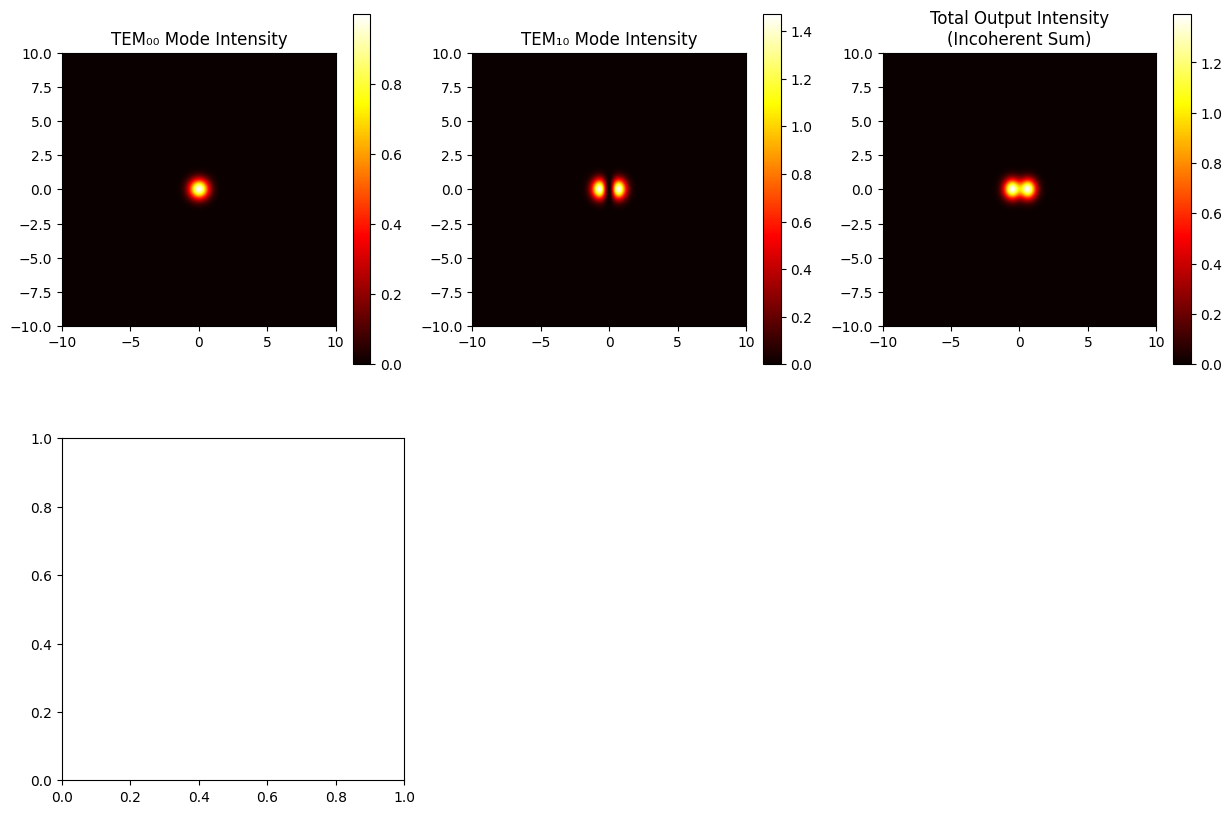

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.fft import fft2, fftshift, ifft2

# 参数设置
wavelength = 10.6e-6  # 波长 10.6um
k = 2 * np.pi / wavelength
w0 = 1e-3  # 基模束腰半径
f = 0.5  # 透镜焦距

# 计算网格
N = 1024
L = 0.02  # 20mm
x = y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)

# 1. 定义单个横模的函数 (Hermite-Gaussian Mode)
def hermite_gaussian_mode(n, m, x, y, w0):
    """
    计算Hermite-Gaussian模TEM_nm的场分布
    n: x方向的阶数
    m: y方向的阶数
    x, y: 网格坐标
    w0: 束腰半径
    """
    # 归一化坐标
    x_norm = np.sqrt(2) * x / w0
    y_norm = np.sqrt(2) * y / w0
    
    # 计算Hermite多项式
    Hn = hermite(n)(x_norm)
    Hm = hermite(m)(y_norm)
    
    # 高斯部分
    gaussian = np.exp(-(x**2 + y**2) / w0**2)
    
    # 合成场分布
    E_mn = Hn * Hm * gaussian
    # 可选：加上该模式的固有相位分布，例如TEM10的pi相位翻转
    # 但对于非相干叠加，相位不影响强度结果，这里忽略
    return E_mn

# 2. 生成两个模式的强度分布 (假设振幅c00=1, c10=0.8)
mode00 = hermite_gaussian_mode(0, 0, X, Y, w0)  # TEM00 mode
mode10 = hermite_gaussian_mode(1, 0, X, Y, w0)  # TEM10 mode

# 3. 模拟多模激光器输出光斑 (非相干叠加：强度直接相加)
I_total = np.abs(mode00)**2 + 0.8**2 * np.abs(mode10)**2

# 4. 计算经过透镜后的变换 (角谱方法)
# 4.1 计算每个模式单独的远场分布（傅里叶变换的模的平方）
# TEM00的远场
F_mode00 = fftshift(fft2(fftshift(mode00)))
I_focal_00 = np.abs(F_mode00)**2

# TEM10的远场
F_mode10 = fftshift(fft2(fftshift(mode10)))
I_focal_10 = np.abs(F_mode10)**2

# 4.2 多模非相干叠加：总焦斑强度 = |C00|^2 * |F{TEM00}|^2 + |C10|^2 * |F{TEM10}|^2
I_focal_total = I_focal_00 + (0.8**2) * I_focal_10

# 5. 绘图
extent = [-L/2*1e3, L/2*1e3, -L/2*1e3, L/2*1e3] # mm
freq_extent = [-N/(2*L)*wavelength*f, N/(2*L)*wavelength*f] # 焦面坐标近似

plt.figure(figsize=(15, 10))

# 激光器输出面光强
plt.subplot(2, 3, 1)
plt.imshow(np.abs(mode00)**2, extent=extent, cmap='hot')
plt.title('TEM₀₀ Mode Intensity')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(np.abs(mode10)**2, extent=extent, cmap='hot')
plt.title('TEM₁₀ Mode Intensity')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(I_total, extent=extent, cmap='hot')
plt.title('Total Output Intensity\n(Incoherent Sum)')
plt.colorbar()

# 透镜后焦面光强
plt.subplot(2, 3, 4)
plt.imshow(I_focal_00, extent=freq_extent, cmap='hot')
plt.title('Focal Spot of TEM₀₀')
plt.xlabel('x (m)')
plt.colorbar()

plt.subplot(2, 3, 5)
plt.imshow(I_focal_10, extent=freq_extent, cmap='hot')
plt.title('Focal Spot of TEM₁₀')
plt.xlabel('x (m)')
plt.colorbar()

plt.subplot(2, 3, 6)
plt.imshow(I_focal_total, extent=freq_extent, cmap='hot')
plt.title('Total Focal Spot\n(Incoherent Sum)')
plt.xlabel('x (m)')
plt.colorbar()

plt.tight_layout()
plt.show()

# 绘制一维剖面图进行比较
plt.figure(figsize=(12, 5))
center_index = N // 2

plt.subplot(1, 2, 1)
plt.plot(x*1e3, I_total[center_index, :], 'k-', linewidth=2, label='Total Output')
plt.plot(x*1e3, np.abs(mode00[center_index, :])**2, 'r--', label='TEM₀₀')
plt.plot(x*1e3, (0.8**2)*np.abs(mode10[center_index, :])**2, 'b--', label='TEM₁₀ × 0.64')
plt.title('Output Plane Intensity Profile')
plt.xlabel('x (mm)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
focal_x = np.linspace(freq_extent[0], freq_extent[1], N)
plt.plot(focal_x, I_focal_total[center_index, :], 'k-', linewidth=2, label='Total Focal Spot')
plt.plot(focal_x, I_focal_00[center_index, :], 'r--', label='TEM₀₀ Focal')
plt.plot(focal_x, (0.8**2)*I_focal_10[center_index, :], 'b--', label='TEM₁₀ Focal × 0.64')
plt.title('Focal Plane Intensity Profile')
plt.xlabel('x (m)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

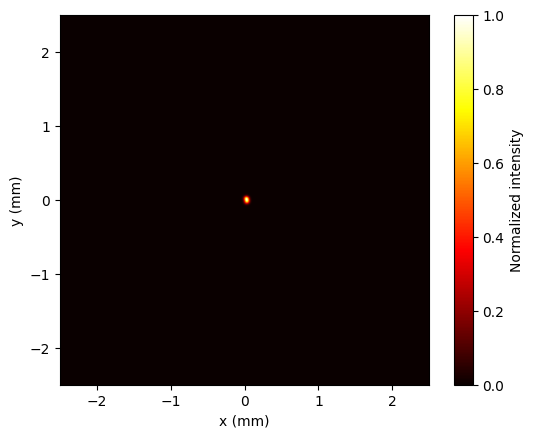

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 网格
N = 1024
L = 5e-3  # 5 mm
x = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, x)

# 输入多模高斯
w0 = 1e-3
num_modes = 5
E_in = np.zeros_like(X, dtype=complex)

for _ in range(num_modes):
    # 随机位置偏移
    x0, y0 = np.random.uniform(-0.5e-3,0.5e-3,2)
    phase = np.random.uniform(0, 2*np.pi)
    E_in += np.exp(-((X-x0)**2 + (Y-y0)**2)/(w0**2)) * np.exp(1j*phase)

# 透镜相位
f = 0.05  # 50 mm
k = 2*np.pi / 10.6e-6
lens_phase = np.exp(-1j * k / (2*f) * (X**2 + Y**2))
E_after_lens = E_in * lens_phase

# 傅里叶传播到焦平面
E_f = np.fft.fftshift(np.fft.fft2(E_after_lens))
I_f = np.abs(E_f)**2
I_f /= I_f.max()

plt.imshow(I_f, cmap='hot', extent=[-L/2*1e3,L/2*1e3,-L/2*1e3,L/2*1e3])
plt.colorbar(label='Normalized intensity')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()


C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:114: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:114: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:114: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:114: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:114: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:114: UserWarni

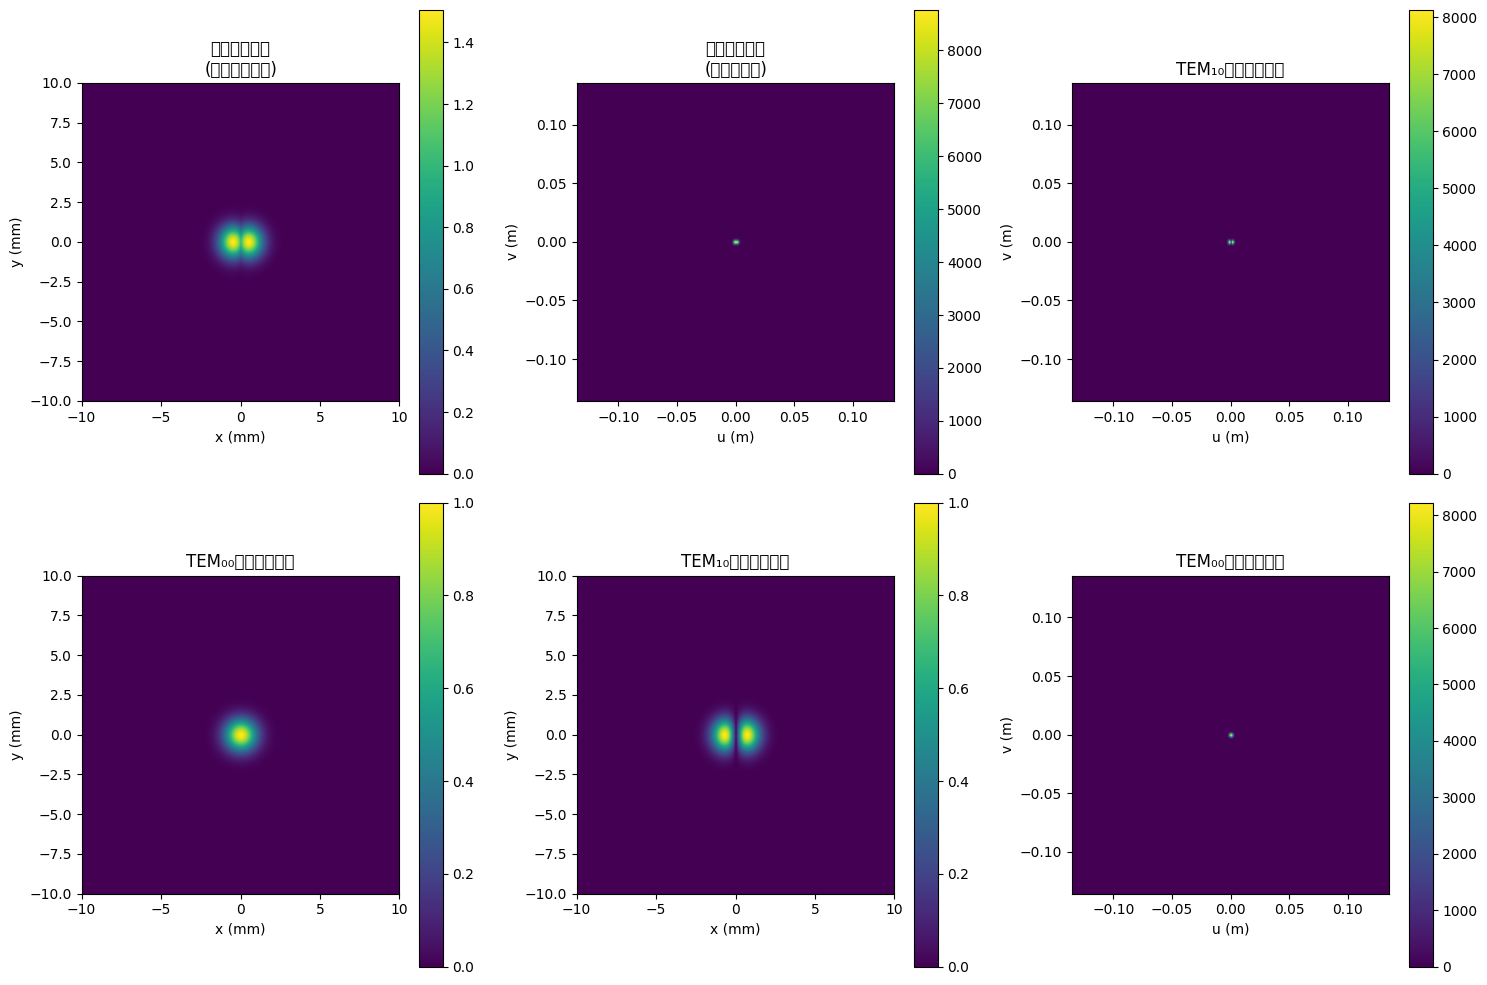

C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:164: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:164: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:164: UserWarning: Glyph 36755 (\N{CJK UNIFIED IDEOGRAPH-8F93}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:164: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:164: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Michael\AppData\Local\Temp\ipykernel_16352\1305478745.py:164: UserWarni

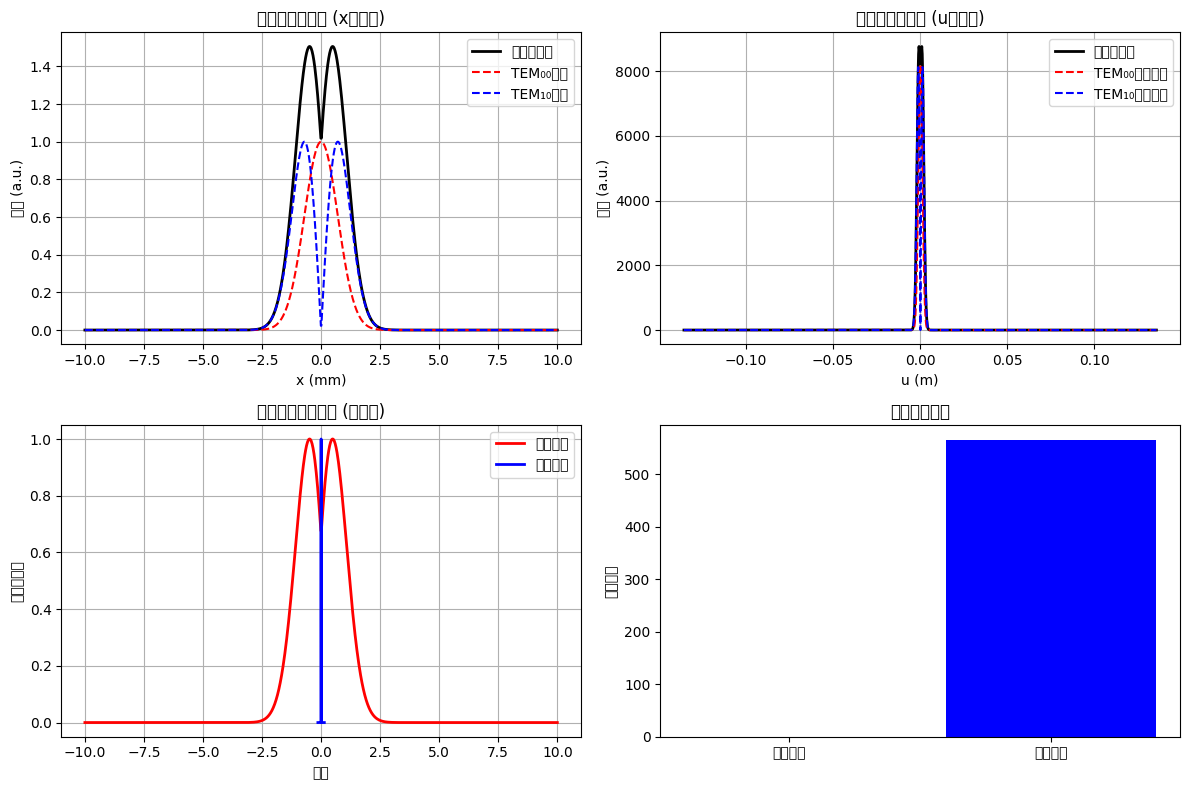

输入功率: 5.2668e-06
输出功率: 5.6607e+02
功率比(输出/输入): 107479435.099040


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.fft import fft2, fftshift, ifft2

# 参数设置
wavelength = 10.6e-6  # 波长 10.6um
w0 = 1e-3  # 基模束腰半径
f = 0.5  # 透镜焦距

# 计算网格
N = 1024
L = 0.02  # 20mm
x = y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)

# 定义Hermite-Gaussian模函数
def hermite_gaussian_mode(n, m, x, y, w0):
    x_norm = np.sqrt(2) * x / w0
    y_norm = np.sqrt(2) * y / w0
    
    Hn = hermite(n)(x_norm)
    Hm = hermite(m)(y_norm)
    
    gaussian = np.exp(-(x**2 + y**2) / w0**2)
    E_mn = Hn * Hm * gaussian
    
    # 归一化
    E_mn /= np.max(np.abs(E_mn))
    return E_mn

# 生成两个模式的场分布
mode00 = hermite_gaussian_mode(0, 0, X, Y, w0)  # TEM00 mode
mode10 = hermite_gaussian_mode(1, 0, X, Y, w0)  # TEM10 mode

# 设置模式权重
c00 = 1.0
c10 = 0.8

# 计算输入振幅（注意：这不是物理场，而是各个模式振幅的包络）
A_in = np.abs(c00 * mode00) + np.abs(c10 * mode10)

# 计算各个模式经过透镜后的场分布（傅里叶变换）
# 注意：需要乘以一个相位因子来模拟透镜效应
fx = np.fft.fftfreq(N, d=L/N)
FY, FX = np.meshgrid(fx, fx)
lens_phase = np.exp(-1j * np.pi * wavelength * f * (FX**2 + FY**2))

# 计算每个模式的输出场
F_mode00 = fftshift(fft2(fftshift(mode00))) * lens_phase
F_mode10 = fftshift(fft2(fftshift(mode10))) * lens_phase

# 计算输出振幅（非相干叠加）
A_out = np.sqrt(
    (c00**2) * np.abs(F_mode00)**2 + 
    (c10**2) * np.abs(F_mode10)**2
)

# 绘制结果
extent_in = [-L/2*1e3, L/2*1e3, -L/2*1e3, L/2*1e3]  # 输入面范围(mm)
# 输出面范围计算（近似）
max_freq = N/(2*L)
extent_out = [-max_freq*wavelength*f, max_freq*wavelength*f, 
              -max_freq*wavelength*f, max_freq*wavelength*f]

plt.figure(figsize=(15, 10))

# 输入振幅分布
plt.subplot(2, 3, 1)
plt.imshow(A_in, extent=extent_in, cmap='viridis')
plt.title('输入振幅分布\n(模式振幅包络)')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

# 输出振幅分布
plt.subplot(2, 3, 2)
plt.imshow(A_out, extent=extent_out, cmap='viridis')
plt.title('输出振幅分布\n(非相干叠加)')
plt.colorbar()
plt.xlabel('u (m)')
plt.ylabel('v (m)')

# 各个模式的输入振幅
plt.subplot(2, 3, 4)
plt.imshow(np.abs(mode00), extent=extent_in, cmap='viridis')
plt.title('TEM₀₀模式输入振幅')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

plt.subplot(2, 3, 5)
plt.imshow(np.abs(mode10), extent=extent_in, cmap='viridis')
plt.title('TEM₁₀模式输入振幅')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

# 各个模式的输出振幅
plt.subplot(2, 3, 6)
plt.imshow(np.abs(F_mode00), extent=extent_out, cmap='viridis')
plt.title('TEM₀₀模式输出振幅')
plt.colorbar()
plt.xlabel('u (m)')
plt.ylabel('v (m)')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(F_mode10), extent=extent_out, cmap='viridis')
plt.title('TEM₁₀模式输出振幅')
plt.colorbar()
plt.xlabel('u (m)')
plt.ylabel('v (m)')

plt.tight_layout()
plt.show()

# 绘制一维剖面图
center_idx = N // 2

plt.figure(figsize=(12, 8))

# 输入振幅剖面
plt.subplot(2, 2, 1)
plt.plot(x*1e3, A_in[center_idx, :], 'k-', linewidth=2, label='总输入振幅')
plt.plot(x*1e3, np.abs(mode00[center_idx, :]), 'r--', label='TEM₀₀振幅')
plt.plot(x*1e3, np.abs(mode10[center_idx, :]), 'b--', label='TEM₁₀振幅')
plt.title('输入面振幅分布 (x轴剖面)')
plt.xlabel('x (mm)')
plt.ylabel('振幅 (a.u.)')
plt.legend()
plt.grid(True)

# 输出振幅剖面
plt.subplot(2, 2, 2)
u = np.linspace(extent_out[0], extent_out[1], N)
plt.plot(u, A_out[center_idx, :], 'k-', linewidth=2, label='总输出振幅')
plt.plot(u, np.abs(F_mode00[center_idx, :]), 'r--', label='TEM₀₀输出振幅')
plt.plot(u, np.abs(F_mode10[center_idx, :]), 'b--', label='TEM₁₀输出振幅')
plt.title('输出面振幅分布 (u轴剖面)')
plt.xlabel('u (m)')
plt.ylabel('振幅 (a.u.)')
plt.legend()
plt.grid(True)

# 输入输出振幅对比（归一化）
plt.subplot(2, 2, 3)
plt.plot(x*1e3, A_in[center_idx, :]/np.max(A_in[center_idx, :]), 'r-', linewidth=2, label='输入振幅')
plt.plot(u, A_out[center_idx, :]/np.max(A_out[center_idx, :]), 'b-', linewidth=2, label='输出振幅')
plt.title('输入输出振幅对比 (归一化)')
plt.xlabel('位置')
plt.ylabel('归一化振幅')
plt.legend()
plt.grid(True)

# 能量守恒验证
power_in = np.sum(A_in**2) * (L/N)**2  # 近似积分
power_out = np.sum(A_out**2) * (extent_out[1]-extent_out[0])/N * (extent_out[1]-extent_out[0])/N

plt.subplot(2, 2, 4)
plt.bar(['输入功率', '输出功率'], [power_in, power_out], color=['red', 'blue'])
plt.title('能量守恒验证')
plt.ylabel('相对功率')

plt.tight_layout()
plt.show()

print(f"输入功率: {power_in:.4e}")
print(f"输出功率: {power_out:.4e}")
print(f"功率比(输出/输入): {power_out/power_in:.6f}")

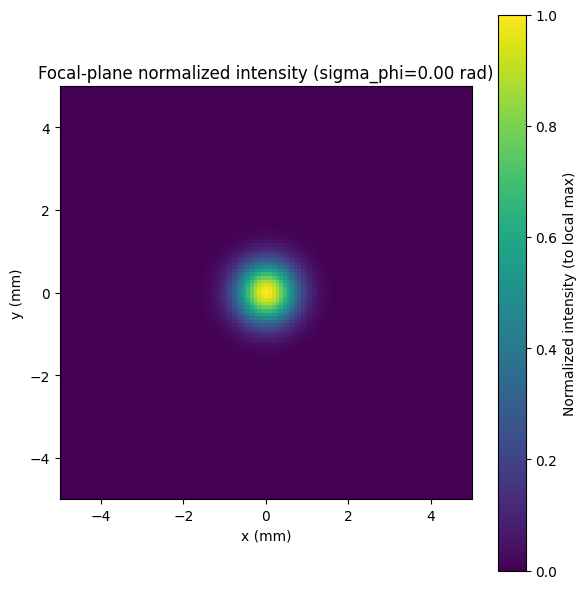

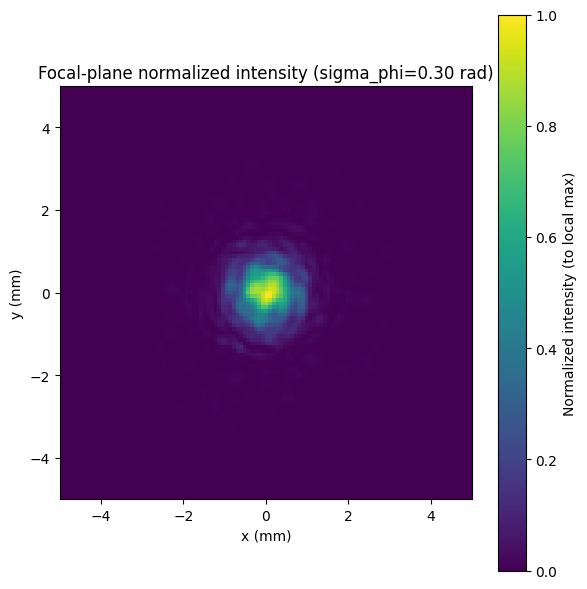

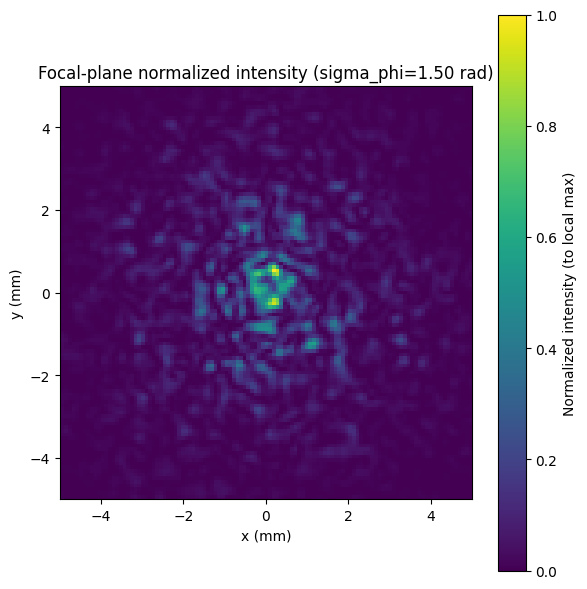

Numeric summary (assumed w0=1.0 mm, f=50 mm, lambda=10.6 um):
 sigma = 0.00 rad | measured Strehl = 1.0000 | theoretical (exp(-sigma^2)) = 1.0000
 sigma = 0.30 rad | measured Strehl = 1.0336 | theoretical (exp(-sigma^2)) = 0.9139
 sigma = 1.50 rad | measured Strehl = 0.4082 | theoretical (exp(-sigma^2)) = 0.1054


In [2]:
# Python simulation of a single-mode Gaussian beam with spatial random phase,
# propagated through a thin lens to the focal plane using Fourier optics (FFT).
# Three cases are simulated: sigma_phi = 0 (ideal), 0.3 rad (weak phase), 1.5 rad (strong phase).
# Each case is shown in its own figure (requirement: one chart per figure).
# Also compute Strehl ratio approximation and measured Strehl (peak intensity ratio).
import numpy as np
import matplotlib.pyplot as plt

# Physical parameters (assumed)
wavelength = 10.6e-6   # 10.6 µm (CO2 laser)
w0 = 1.0e-3            # input beam waist 1.0 mm
f = 50e-3              # lens focal length 50 mm
k = 2 * np.pi / wavelength

# Numerical grid
N = 1024
L = 6e-3  # physical size of window: 6 mm
x = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, x)
R2 = X**2 + Y**2

# Input gaussian field (amplitude)
E0 = np.exp(-R2 / w0**2)

# Lens phase (thin lens) at plane of E0
lens_phase = np.exp(-1j * k / (2 * f) * R2)

# Frequencies for FFT to map to focal plane coordinates
fx = np.fft.fftfreq(N, d=(x[1]-x[0]))
FX, FY = np.meshgrid(fx, fx)
# focal plane coordinates (approx): xf = lambda * f * fx
xf = wavelength * f * FX
yf = wavelength * f * FY
extent_mm = [xf.min()*1e3, xf.max()*1e3, yf.min()*1e3, yf.max()*1e3]

# Function to propagate to focal plane (Fourier transform after lens)
def focal_plane_intensity(Ein):
    E_after_lens = Ein * lens_phase
    Ef = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(E_after_lens)))
    I = np.abs(Ef)**2
    return I

# Simulate three sigma_phi cases
sigma_list = [0.0, 0.3, 1.5]
results = []
I_ideal = focal_plane_intensity(E0)  # ideal reference (no phase)
peak_ideal = I_ideal.max()

for sigma in sigma_list:
    if sigma == 0.0:
        phase = np.zeros_like(X)
    else:
        # generate a spatially correlated random phase to mimic aberration/turbulence
        # create white noise then low-pass filter in Fourier domain to introduce correlation
        rnd = np.random.normal(size=(N, N))
        R = np.fft.fft2(rnd)
        # apply gaussian low-pass filter in frequency domain to set correlation scale
        cutoff_scale = 0.05  # relative frequency scale (tune to change speckle grain size)
        fx_abs = np.sqrt(FX**2 + FY**2)
        gauss_filter = np.exp(-(fx_abs/(cutoff_scale*np.max(fx_abs)))**2)
        correlated = np.fft.ifft2(R * gauss_filter).real
        # normalize and scale to desired sigma (radians)
        correlated = (correlated - correlated.mean()) / correlated.std()
        phase = correlated * sigma

    Ein = E0 * np.exp(1j * phase)
    I = focal_plane_intensity(Ein)
    peak = I.max()
    measured_strehl = peak / peak_ideal
    theoretical_strehl = np.exp(-sigma**2)  # Maréchal approximation (for small phase variance)
    results.append({
        'sigma': sigma,
        'I': I,
        'peak': peak,
        'measured_strehl': measured_strehl,
        'theoretical_strehl': theoretical_strehl
    })

# Plot each result in its own figure (no subplots) and print Strehl values.
for res in results:
    sigma = res['sigma']
    I = res['I']
    fig = plt.figure(figsize=(6,6))
    plt.imshow(I / I.max(), origin='lower', extent=extent_mm)
    plt.title(f'Focal-plane normalized intensity (sigma_phi={sigma:.2f} rad)')
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    cb = plt.colorbar()
    cb.set_label('Normalized intensity (to local max)')
    plt.tight_layout()
    plt.show()

# Print numeric summary
print("Numeric summary (assumed w0=1.0 mm, f=50 mm, lambda=10.6 um):")
for res in results:
    print(f" sigma = {res['sigma']:.2f} rad | measured Strehl = {res['measured_strehl']:.4f} | "
          f"theoretical (exp(-sigma^2)) = {res['theoretical_strehl']:.4f}")


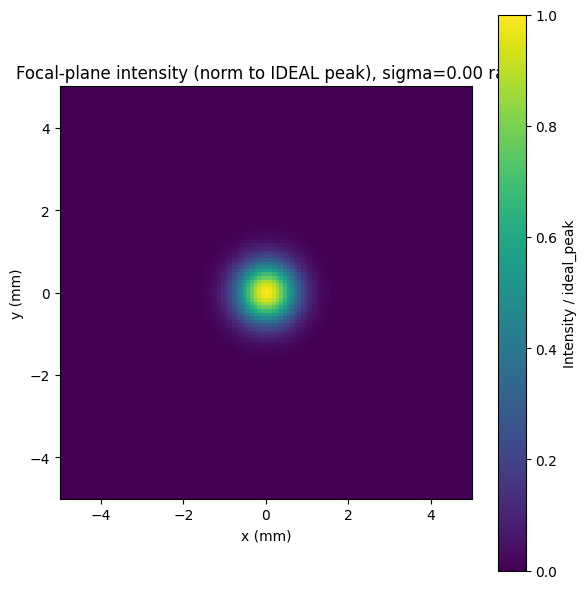

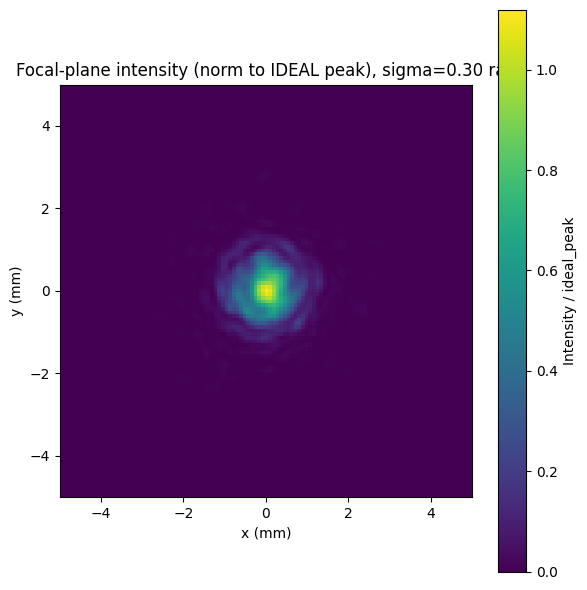

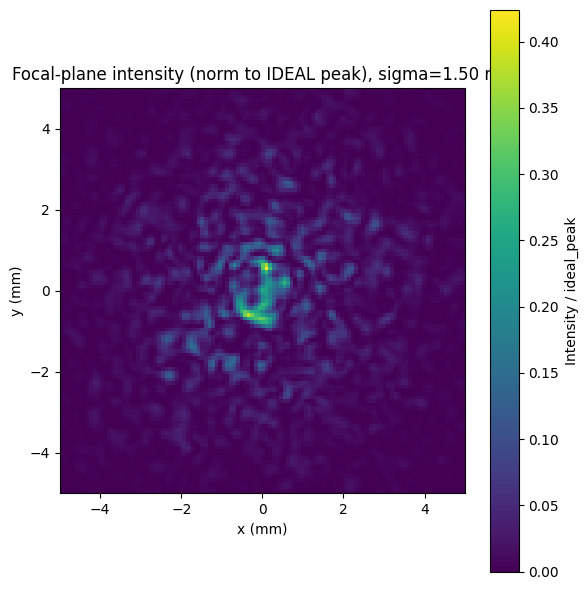

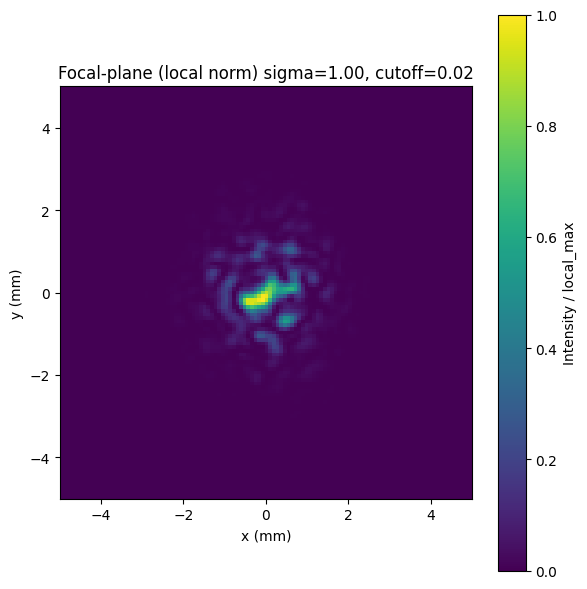

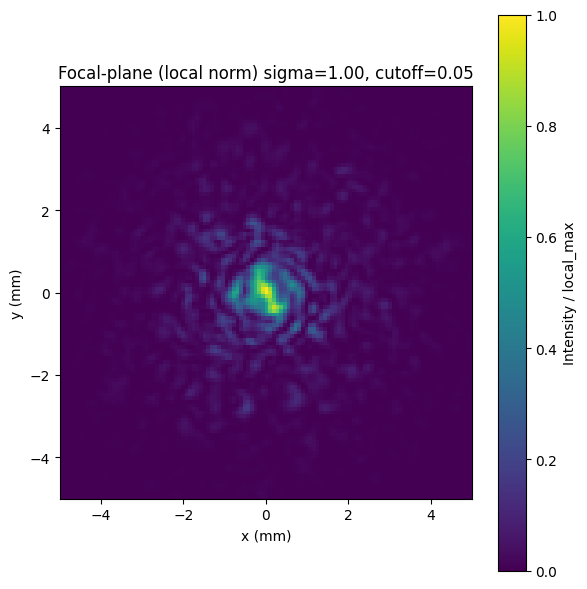

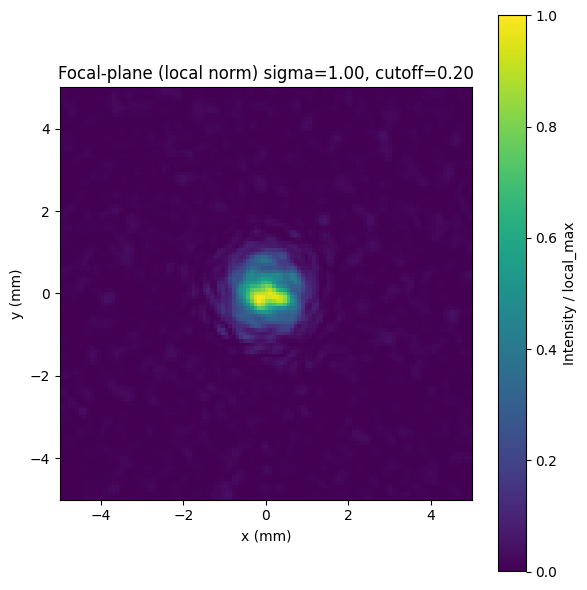

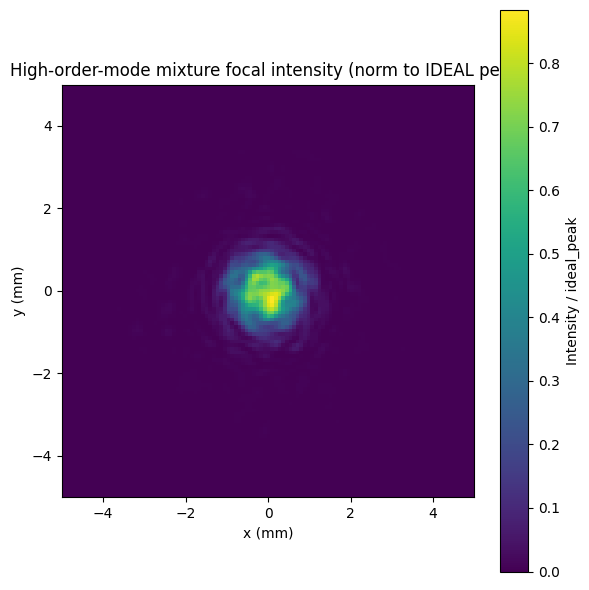

In [6]:
# Simulation: extensions requested by user
# - (1) Show focal-plane images normalized to the IDEAL (sigma=0) peak for direct comparison
# - (2) Show effect of changing phase correlation scale (cutoff_scale) on speckle grain size
# - (3) Compute beam radius (second-moment / RMS -> convert to equivalent Gaussian w parameter) and Strehl for each case
# - (4) Add a high-order-mode (HOM) input case (mixture of HG modes) and compute/display same metrics
#
# Notes:
# - Physical params: lambda=10.6um, w0=1.0 mm, f=50 mm (same as before)
# - Numerical: N=1024, window L=6 mm
# - Phase generation: white noise filtered in frequency domain with gaussian low-pass (cutoff_scale param)
# - Beam radius computed from second moment: for Gaussian I(r)=I0 exp(-2 r^2 / w^2),
#   second moment m2 = w^2 / 4, so equivalent Gaussian w_eq = 2 * sqrt(m2)
#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

# Physical parameters
wavelength = 10.6e-6   # m
w0 = 1.0e-3            # input beam waist 1.0 mm
f = 50e-3              # lens focal length 50 mm
k = 2 * np.pi / wavelength

# Numerical grid
N = 1024
L = 6e-3  # physical size of window: 6 mm
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]
X, Y = np.meshgrid(x, x)
R2 = X**2 + Y**2

# Input gaussian amplitude (fundamental)
E0 = np.exp(-R2 / w0**2)

# Thin lens phase
lens_phase = np.exp(-1j * k / (2 * f) * R2)

# Frequency coords and focal plane coordinates
fx = np.fft.fftfreq(N, d=dx)
FX, FY = np.meshgrid(fx, fx)
xf = wavelength * f * FX
yf = wavelength * f * FY
extent_mm = [xf.min()*1e3, xf.max()*1e3, yf.min()*1e3, yf.max()*1e3]

def focal_plane_intensity(Ein):
    E_after_lens = Ein * lens_phase
    Ef = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(E_after_lens)))
    I = np.abs(Ef)**2
    return I, Ef

# Helper: create correlated random phase field with given sigma and cutoff_scale
def correlated_phase_field(sigma, cutoff_scale):
    if sigma == 0.0:
        return np.zeros_like(X)
    rnd = np.random.normal(size=(N, N))
    R = np.fft.fft2(rnd)
    fx_abs = np.sqrt(FX**2 + FY**2)
    # avoid division by zero in scaling; scale relative to max freq
    max_fx = np.max(fx_abs)
    if max_fx == 0:
        gauss_filter = np.ones_like(fx_abs)
    else:
        gauss_filter = np.exp(-(fx_abs/(cutoff_scale * max_fx + 1e-16))**2)
    correlated = np.fft.ifft2(R * gauss_filter).real
    correlated = (correlated - correlated.mean()) / (correlated.std() + 1e-16)
    return correlated * sigma

# Function to compute second-moment beam radius (w_eq = 2*sqrt(m2))
def compute_w_rms(I, X, Y):
    total = I.sum() + 1e-16
    m2x = (I * X**2).sum() / total
    m2y = (I * Y**2).sum() / total
    m2 = 0.5 * (m2x + m2y)  # average radial second moment
    w_eq = 2.0 * np.sqrt(m2)
    return w_eq

# Baseline ideal case
I_ideal, Ef_ideal = focal_plane_intensity(E0)
peak_ideal = I_ideal.max()

# 1) Same-normalization comparison for sigma list
sigma_list = [0.0, 0.3, 1.5]
same_norm_results = []

for sigma in sigma_list:
    phase = correlated_phase_field(sigma, cutoff_scale=0.05)
    Ein = E0 * np.exp(1j * phase)
    I, Ef = focal_plane_intensity(Ein)
    measured_strehl = I.max() / peak_ideal
    w_eq = compute_w_rms(I, xf, yf)
    same_norm_results.append({'sigma': sigma, 'I': I, 'peak': I.max(),
                              'measured_strehl': measured_strehl, 'w_eq_m': w_eq})

# Plot each with same normalization (normalize to ideal peak)
for res in same_norm_results:
    sigma = res['sigma']
    I = res['I'] / peak_ideal  # same normalization across images
    fig = plt.figure(figsize=(6,6))
    plt.imshow(I, origin='lower', extent=extent_mm)
    plt.title(f'Focal-plane intensity (norm to IDEAL peak), sigma={sigma:.2f} rad')
    plt.xlabel('x (mm)'); plt.ylabel('y (mm)')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    cb = plt.colorbar(); cb.set_label('Intensity / ideal_peak')
    plt.tight_layout()
    plt.show()

# 2) Effect of cutoff_scale (phase correlation scale) for a fixed sigma
sigma_for_cutoff = 1.0  # use intermediate strong-ish phase
cutoff_scales = [0.02, 0.05, 0.2]  # smaller->finer speckle, larger->coarser speckle
cutoff_results = []
for cs in cutoff_scales:
    phase = correlated_phase_field(sigma_for_cutoff, cutoff_scale=cs)
    Ein = E0 * np.exp(1j * phase)
    I, Ef = focal_plane_intensity(Ein)
    measured_strehl = I.max() / peak_ideal
    w_eq = compute_w_rms(I, xf, yf)
    cutoff_results.append({'cutoff_scale': cs, 'I': I, 'peak': I.max(), 'measured_strehl': measured_strehl, 'w_eq_m': w_eq})
    # Plot (normalized to local max for visibility of speckle)
    fig = plt.figure(figsize=(6,6))
    plt.imshow(I / I.max(), origin='lower', extent=extent_mm)
    plt.title(f'Focal-plane (local norm) sigma={sigma_for_cutoff:.2f}, cutoff={cs:.2f}')
    plt.xlabel('x (mm)'); plt.ylabel('y (mm)')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    cb = plt.colorbar(); cb.set_label('Intensity / local_max')
    plt.tight_layout()
    plt.show()

# 3) Numeric table: for sigma_list give measured Strehl and w_eq (in microns/mm)
table_rows = []
for res in same_norm_results:
    table_rows.append({'sigma_rad': res['sigma'],
                       'measured_Strehl': res['measured_strehl'],
                       'w_eq_mm': res['w_eq_m']*1e3,
                       'peak_relative_to_ideal': res['peak']/peak_ideal})

df_sigma = pd.DataFrame(table_rows)

# 4) High-order mode case: build a superposition of Hermite-Gauss modes
# We'll create normalized HG modes (up to order 2) at waist w0 in cartesian coords.
# HG_mn(x,y) = H_m(sqrt(2) x / w0) H_n(sqrt(2) y / w0) * exp(-(x^2+y^2)/w0^2)
from numpy.polynomial.hermite import Hermite

def hg_mode(m, n, X, Y, w):
    # Use physicists' Hermite polynomials H_m; evaluate using numpy.polynomial.hermite
    xi = np.sqrt(2) * X / w
    yi = np.sqrt(2) * Y / w
    Hm = Hermite.basis(m)(xi)
    Hn = Hermite.basis(n)(yi)
    amplitude = Hm * Hn * np.exp(-(X**2 + Y**2)/w**2)
    return amplitude

# coefficients for modes: mostly fundamental + small HOM admixture
coeffs = {
    (0,0): 0.90,
    (1,0): 0.05,
    (0,1): 0.03,
    (2,0): 0.01,
    (0,2): 0.01
}

E_hom = np.zeros_like(E0, dtype=complex)
for (m,n), c in coeffs.items():
    mode = hg_mode(m, n, X, Y, w0)
    # normalize mode energy (so coefficients more intuitive)
    mode_energy = (np.abs(mode)**2).sum()
    if mode_energy > 0:
        mode = mode / np.sqrt(mode_energy)
    E_hom += c * mode

# scale E_hom to have same total energy as E0 (optional)
scale = np.sqrt((np.abs(E0)**2).sum() / (np.abs(E_hom)**2).sum())
E_hom *= scale

# Add optional random phase to HOM case (simulate imperfect wavefront)
phase_hom = correlated_phase_field(0.3, cutoff_scale=0.05)
E_hom_phased = E_hom * np.exp(1j * phase_hom)

I_hom, Ef_hom = focal_plane_intensity(E_hom_phased)
peak_hom = I_hom.max()
measured_strehl_hom = peak_hom / peak_ideal
w_eq_hom = compute_w_rms(I_hom, xf, yf)

# Plot HOM focal intensity (normalized to ideal peak to compare Strehl)
fig = plt.figure(figsize=(6,6))
plt.imshow(I_hom / peak_ideal, origin='lower', extent=extent_mm)
plt.title('High-order-mode mixture focal intensity (norm to IDEAL peak)')
plt.xlabel('x (mm)'); plt.ylabel('y (mm)')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
cb = plt.colorbar(); cb.set_label('Intensity / ideal_peak')
plt.tight_layout()
plt.show()

# Present numeric summary including HOM
hom_row = {'sigma_rad': 'HOM(0.3ph)', 'measured_Strehl': measured_strehl_hom, 'w_eq_mm': w_eq_hom*1e3, 'peak_relative_to_ideal': peak_hom/peak_ideal}

df_all = pd.concat([df_sigma, pd.DataFrame([hom_row])], ignore_index=True)
# Display dataframe to user (interactive table)
# import caas_jupyter_tools as cjt
# cjt.display_dataframe_to_user("Simulation summary (sigma and HOM cases)", df_all)

# # Also print summary to output
# print("Numeric summary (w0=1.0 mm, f=50 mm, lambda=10.6 um):")
# print(df_all.to_string(index=False))
